In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy import stats

# Nomor 1

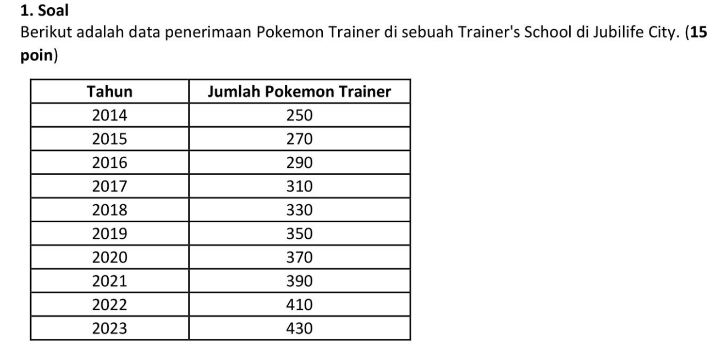

In [1]:
# tahun dan jumlah pokemon trainer
data_pokemon = {
    2014 : 250,
    2015 : 270,
    2016 : 290,
    2017 : 310,
    2018 : 330,
    2019 : 350,
    2020 : 370,
    2021 : 390,
    2022 : 410,
    2023 : 430
}

In [4]:
# 1.	Hitunglah mean, median, standar deviasi, variansi, dan IQR dari jumlah penerimaan Pokemon Trainer dalam 10 tahun pertama. 

# mean
mean = np.mean(list(data_pokemon.values()))
print(f"Mean : {mean}")

# median
median = np.median(list(data_pokemon.values()))
print(f"Median : {median}")

# standar deviasi
std_dev = np.std(list(data_pokemon.values()), ddof=1)
print(f"Standar Deviasi : {std_dev}")

# variansi
variance = np.var(list(data_pokemon.values()), ddof=1)
print(f"Variansi : {variance}")

# IQR
Q1 = np.percentile(list(data_pokemon.values()), 25)
Q3 = np.percentile(list(data_pokemon.values()), 75)
IQR = Q3 - Q1
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")


Mean : 340.0
Median : 340.0
Standar Deviasi : 60.55300708194983
Variansi : 3666.6666666666665
Q1 : 295.0
Q3 : 385.0
IQR : 90.0


In [12]:
# 2.	Buat model regresi linier sederhana untuk memprediksi jumlah Pokemon Trainer berdasarkan tahun. 

# x = tahun
x = np.array(list(data_pokemon.keys())).reshape(-1, 1)

# y = jumlah pokemon trainer
y = np.array(list(data_pokemon.values()))

# regresi linier
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

# prediksi jumlah pokemon trainer pada tahun 2024-2030
x_pred = np.array(range(2024, 2031)).reshape(-1, 1)
y_pred = model.predict(x_pred)

print(f"Prediksi jumlah Pokemon Trainer pada tahun 2024-2030 : {y_pred}")

Prediksi jumlah Pokemon Trainer pada tahun 2024-2030 : [450. 470. 490. 510. 530. 550. 570.]


In [13]:
# 2.	Buat model regresi linier sederhana untuk memprediksi jumlah Pokemon Trainer berdasarkan tahun.
def mean(data):
    return sum(data) / len(data)

def covariance(data1, data2):
    mean1 = mean(data1)
    mean2 = mean(data2)
    return sum((data1[i] - mean1) * (data2[i] - mean2) for i in range(len(data1))) / len(data1)

def variance(data):
    mean_data = mean(data)
    return sum((x - mean_data) ** 2 for x in data) / len(data)

def linear_regression(x, y):
    b1 = covariance(x, y) / variance(x)
    b0 = mean(y) - b1 * mean(x)
    return b0, b1

# prediksi jumlah pokemon trainer pada tahun 2024-2030
x = list(data_pokemon.keys())
y = list(data_pokemon.values())
b0, b1 = linear_regression(x, y)

x_pred = list(range(2024, 2031))
y_pred = [b0 + b1 * x for x in x_pred]

print(f"Prediksi jumlah Pokemon Trainer pada tahun 2024-2030 : {y_pred}")


Prediksi jumlah Pokemon Trainer pada tahun 2024-2030 : [450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0]


In [31]:
# 3.	Hitung koefisien korelasi antara tahun dan jumlah penerimaan Pokemon Trainer, kemudian apakah terdapat hubungan linear yang kuat antara tahun dan jumlah penerimaan Pokemon Trainer? 

# koefisien korelasi dengan rumus pearson
correlation_pearson = covariance(x, y) / (np.sqrt(variance(x)) * np.sqrt(variance(y)))
print(f"Koefisien Korelasi : {correlation_pearson}")

# koefisien korelasi dengan rumus spearman 
correlation_spearman, _ = stats.spearmanr(x, y)
print(f"Koefisien Korelasi : {correlation_spearman}")

if correlation_pearson > 0.8:
    print("Hubungan linear yang kuat")
else:
    print("Hubungan linear yang lemah")



Koefisien Korelasi : 1.0
Koefisien Korelasi : 0.9999999999999999
Hubungan linear yang kuat


# Nomor 2

In [33]:
import pandas as pd

pokemon = pd.read_excel("pokemon 2324.xlsx")
pokemon

,Pokemon,type,status,attack,hp,def,cp
0,Flaeron,Fire,Caught,246,103,179,1648
1,Ninetales,Fire,Caught,169,121,190,1461
2,Furfrou,Normal,Caught,164,128,167,1403
3,Throh,Fighting,Caught,172,157,160,1288
4,Heracross,Bug/Fighting,Caught,234,105,179,1243
...,...,...,...,...,...,...,...
710,Grimmer,Poison,Caught,80,65,50,216
711,Venusaur,Grass/Poison,Caught,82,121,83,1510
712,Stunfisk,Ground/Steel,Caught,66,145,84,1091
713,Gloom,Grasss/Poison,Caught,65,111,70,1142


In [38]:
# 2.	Rata-rata CP pada Pokemon tipe Dark adalah 195, 2632 dengan simpangan baku 218,9122. Dianggap pengukuran CP ini bersebaran normal. Berapakah peluang bahwa 10 Pokemon dari jenis ini akan memiliki CP di bawah 70? 

# diketahui
mean = 195
std_dev = 218.9122
n = 10
x = 70

# z-score dan peluang
z = (x - mean) / (std_dev / np.sqrt(n))
print(f"Z-Score : {z}")

# peluang Cumulative Distribution Function (CDF) dari z-score
p = stats.norm.cdf(z)
print(f"Peluang : {p}")

Z-Score : -1.8056769221680993
Peluang : 0.03548440974382833


In [40]:
# 3.	Misalkan spesies Pokemon tertentu dengan populasi tidak diketahui (sangat banyak) memiliki varians attack 803,539. Diambil sampel sebanyak 12 pokemon secara acak kemudian diperoleh rata-rata attacknya adalah 70, 25. Hitunglah rentang nilai rata-rata attack dari pokemon tersebut dengan tingkat kepercayaan 95%! 

# diketahui
n = 12
mean = 70.25
variance = 803.539
kepercayaan = 0.95
alpha = 1 - kepercayaan

# z-score
z = stats.norm.ppf(1 - alpha / 2)
print(f"Z-Score : {z}")

# rentang nilai rata-rata
interval = z * np.sqrt(variance / n)
print(f"Rentang Nilai Rata-Rata : {mean - interval} sampai {mean + interval}")




Z-Score : 1.959963984540054
Rentang Nilai Rata-Rata : 54.21160341731512 sampai 86.28839658268488


In [41]:
# 4.	Nurse Joy ingin mengetahui apakah terdapat perbedaan signifikan dalam rata-rata jumlah pasien yang datang di dua cabang Pokemon Center yakni di Johto dan Kanto. Dia mengumpulkan data jumlah pasien selama seminggu dari kedua cabang Pokemon Center. Cabang pertama memiliki rata-rata 120 pasien per hari dengan standar deviasi 15 pasien, sementara cabang kedua memiliki rata-rata 110 pasien per hari dengan standar deviasi 20 pasien. Uji apakah ada perbedaan signifikan dalam rata-rata jumlah pasien di kedua cabang Pokemon Center, dengan tingkat signifikansi 0.01!

# diketahui
mean1 = 120
std_dev1 = 15
n1 = 7
mean2 = 110
std_dev2 = 20
n2 = 7
alpha = 0.01

# z-score
z = (mean1 - mean2) / np.sqrt((std_dev1 ** 2 / n1) + (std_dev2 ** 2 / n2))
print(f"Z-Score : {z}")

# p-value
p = 1 - stats.norm.cdf(z)
print(f"P-Value : {p}")

if p < alpha:
    print("Ada perbedaan signifikan")
else:
    print("Tidak ada perbedaan signifikan")


Z-Score : 1.0583005244258363
P-Value : 0.14495922697128494
Tidak ada perbedaan signifikan


In [43]:
# 5.	Seorang Scientist di sebuah Trainer's School ingin mengetahui apakah distribusi nilai ujian Basic Pokemon Recognition dari Pokemon Trainer dalam suatu kelas mengikuti distribusi normal. Dia mengumpulkan data dari 40 Pokemon Trainer dalam kelas tersebut. Berikut adalah nilai ujian Basic Pokemon Recognition mereka:
# 82, 78, 85, 90, 88, 75, 79, 83, 87, 84, 86, 89, 81, 80, 76, 77, 79, 83, 85, 88, 86, 84, 82, 78, 79, 83, 87, 84, 81, 80, 76, 77, 79, 83, 85, 88, 86, 84, 82, 78
# Uji apakah distribusi nilai ujian Basic Pokemon Recognition ini mengikuti distribusi normal dengan tingkat signifikansi 0.05 menggunakan uji Kolmogorov-Smirnov. 

# diketaui
data = [82, 78, 85, 90, 88, 75, 79, 83,
        87, 84, 86, 89, 81, 80, 76, 77,
        79, 83, 85, 88, 86, 84, 82, 78, 
        79, 83, 87, 84, 81, 80, 76, 77, 
        79, 83, 85, 88, 86, 84, 82, 78]

# uji normalitas dengan Z-Score dan P-Value
mean = np.mean(data)
std_dev = np.std(data)
n = len(data)

z = (mean - 80) / (std_dev / np.sqrt(n))
print(f"Z-Score : {z}")

p = stats.norm.cdf(z)
print(f"P-Value : {p}")

if p < 0.05:
    print("Distribusi tidak normal")
else:
    print("Distribusi normal")
    



Z-Score : 3.883807998673243
P-Value : 0.9999485834384993
Distribusi normal


In [47]:
# Menghitung rata-rata dan standar deviasi
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Menggunakan ddof=1 untuk sampel

# Menghitung skewness dan kurtosis
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data, fisher=False)  # Fisher=False untuk kurtosis biasa

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Uji normalitas dengan Kolmogorov-Smirnov Test
stat, p = stats.kstest(data, 'norm', args=(mean, std_dev))
print(f"Statistik dengan Kolmogorov-Smirnov Test: {stat}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Distribusi tidak normal")
else:
    print("Distribusi normal")
    

Mean: 82.425
Standard Deviation: 3.9992787811342643
Skewness: -0.03222698366890485
Kurtosis: 2.0088275219743315
Statistik dengan Kolmogorov-Smirnov Test: 0.10411293792826476
P-Value: 0.7398259144880167
Distribusi normal


In [46]:
# Menghitung rata-rata dan standar deviasi
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Menggunakan ddof=1 untuk sampel

# Menghitung skewness dan kurtosis
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data, fisher=False)  # Fisher=False untuk kurtosis biasa

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Uji normalitas dengan Shapiro-Wilk
shapiro_test = stats.shapiro(data)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, P-Value: {shapiro_test.pvalue}")

# Interpretasi hasil
if shapiro_test.pvalue < 0.05:
    print("Distribusi tidak normal")
else:
    print("Distribusi normal")

Mean: 82.425
Standard Deviation: 3.9992787811342643
Skewness: -0.03222698366890485
Kurtosis: 2.0088275219743315
Shapiro-Wilk Test Statistic: 0.9710320234298706, P-Value: 0.38781362771987915
Distribusi normal
